<a href="https://colab.research.google.com/github/antonioravila/PoliticaExternaBrasileira/blob/main/Comex/COMEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#Comércio Exterior Brasileiro

## Bibliotecas e Params

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from matplotlib.ticker import FuncFormatter

In [109]:
plt.rcParams['font.size'] = 13.5

##Importando dados csv

In [110]:
df_balanca = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/Dados/BalancaComercial.csv', sep=';', on_bad_lines='skip')
df_destino = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/Dados/PorDestino.csv', sep=';', on_bad_lines='skip', encoding='latin-1')

In [111]:
df_balanca['Total'] = df_balanca['Exp'] + df_balanca['Imp']
df_balanca

,Ano,Exp,Imp,Saldo,Total
0,1964,1430000000,1086000000,344000000,2516000000
1,1965,1595000000,941000000,654000000,2536000000
2,1966,1741000000,1303000000,438000000,3044000000
3,1967,1654000000,1441000000,213000000,3095000000
4,1968,1881000000,1855000000,26000000,3736000000
5,1969,2311000000,1993000000,318000000,4304000000
6,1970,2739000000,2507000000,232000000,5246000000
7,1971,2904000000,3247000000,-343000000,6151000000
8,1972,3991000000,4232000000,-241000000,8223000000
9,1973,6199000000,6192000000,7000000,12391000000


In [112]:
df_destino.head()

,Tipo,Ano,Destino,Valor_percentual
0,Exp,1964,América do Sul,0.097
1,Exp,1964,Estados Unidos,0.332
2,Exp,1964,Europa,0.329
3,Exp,1964,Ásia,0.034
4,Exp,1964,Oriente Médio,0.009


In [113]:
df_destino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tipo              192 non-null    object 
 1   Ano               192 non-null    int64  
 2   Destino           192 non-null    object 
 3   Valor_percentual  192 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ KB


## Tratamento dos dados

In [114]:
df_destino['Presidente'] = ["Castelo" if ano in (1964, 1965, 1966) else "" 
                            "Costa e Silva" if ano in (1967, 1968, 1969) else ""
                            "Medici" if ano in (1970, 1971, 1972, 1973) else ""
                            "Geisel" if ano in (1974, 1975, 1976, 1977, 1978, 1979) else ""
                            for ano in df_destino["Ano"]]

In [115]:
df_destino

,Tipo,Ano,Destino,Valor_percentual,Presidente
0,Exp,1964,América do Sul,0.097,Castelo
1,Exp,1964,Estados Unidos,0.332,Castelo
2,Exp,1964,Europa,0.329,Castelo
3,Exp,1964,Ásia,0.034,Castelo
4,Exp,1964,Oriente Médio,0.009,Castelo
...,...,...,...,...,...
187,Imp,1979,Estados Unidos,0.179,Geisel
188,Imp,1979,Europa,0.181,Geisel
189,Imp,1979,Ásia,0.082,Geisel
190,Imp,1979,Oriente Médio,0.321,Geisel


## Análise

### Balança Comercial

In [116]:
df_balanca.head(2)

,Ano,Exp,Imp,Saldo,Total
0,1964,1430000000,1086000000,344000000,2516000000
1,1965,1595000000,941000000,654000000,2536000000


In [117]:
palette = "summer_r"

In [118]:
def create_plots(metric, title):
    plt.rc('figure', figsize = (12,6))
    ax = sns.barplot(x='Ano', y=f'{metric}', data=df_balanca, palette=palette)
    ax.set_title(f'{title}', fontsize = 'xx-large')
    ax.set_ylabel('Bilhões de reais')

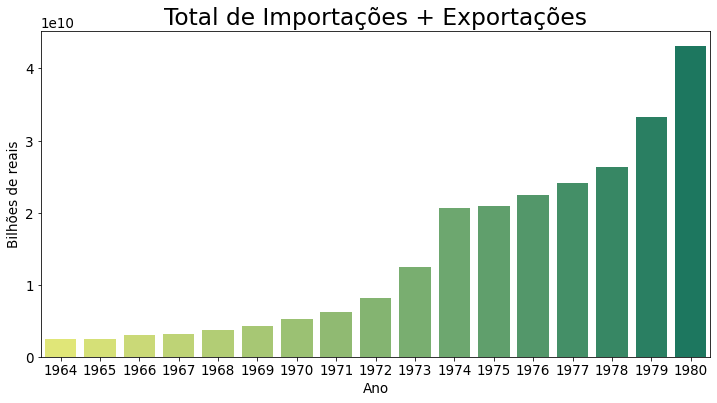

In [119]:
create_plots(metric='Total', title='Total de Importações + Exportações')

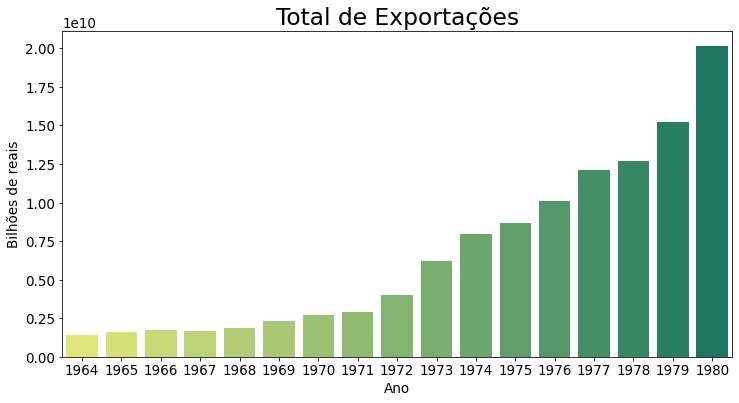

In [120]:
create_plots(metric='Exp', title='Total de Exportações')

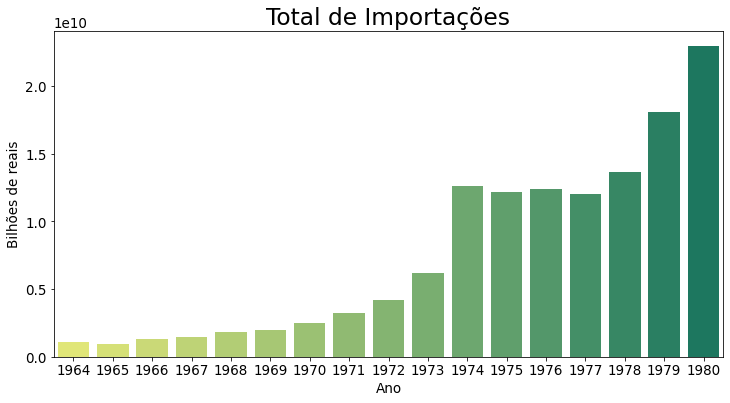

In [121]:
create_plots(metric='Imp', title='Total de Importações')

### Exportações e Importações por Destino

In [122]:
df_destino.head(2)

,Tipo,Ano,Destino,Valor_percentual,Presidente
0,Exp,1964,América do Sul,0.097,Castelo
1,Exp,1964,Estados Unidos,0.332,Castelo


In [123]:
america_do_sul = df_destino[df_destino['Destino'] == 'América do Sul']
estados_unidos = df_destino[df_destino['Destino'] == 'Estados Unidos']
europa = df_destino[df_destino['Destino'] == 'Europa']
asia = df_destino[df_destino['Destino'] == 'Ásia']
oriente_medio = df_destino[df_destino['Destino'] == 'Oriente Médio']
africa = df_destino[df_destino['Destino'] == 'Africa']

In [124]:
def create_plots_II(df, name):
    plt.rc('figure', figsize = (12,6))
    
    ax = sns.lineplot(data=df, x='Ano', y='Valor_percentual', 
                      hue='Tipo', marker='o', palette=palette)
    ax.set_title(f'Comércio Exterior (%) {name}', fontsize = 'xx-large')
    ax.set_ylabel('Percentual de participação total')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))
    
    for x, y in zip(df['Ano'], df['Valor_percentual']):
        plt.text(x = x, y = y+(y*0.015), s = f"{y*100:.2f}%", 
                fontdict={'size':9,'weight':'bold'})

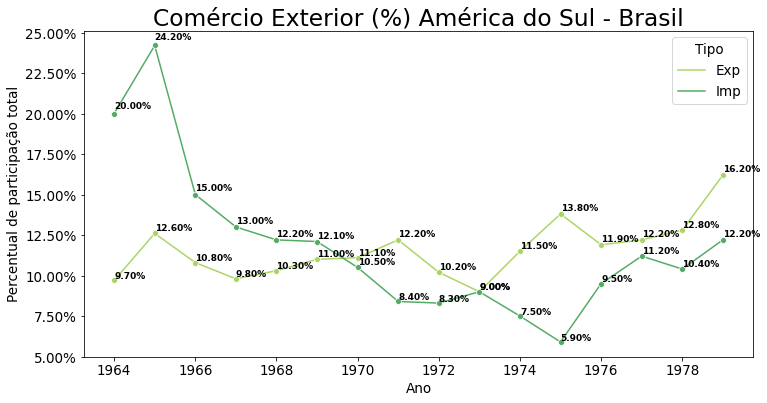

In [125]:
create_plots_II(df=america_do_sul, name = "América do Sul - Brasil")

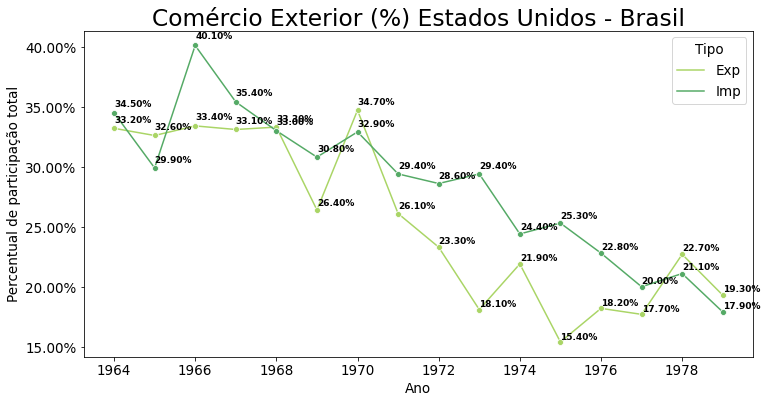

In [126]:
create_plots_II(df=estados_unidos, name = "Estados Unidos - Brasil")

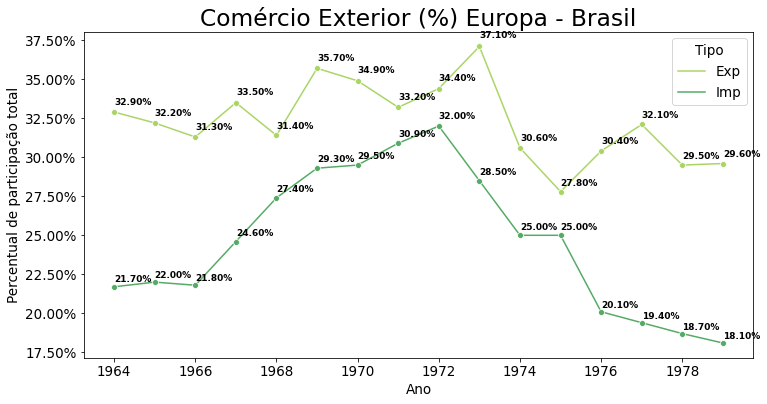

In [127]:
create_plots_II(df=europa, name = "Europa - Brasil")

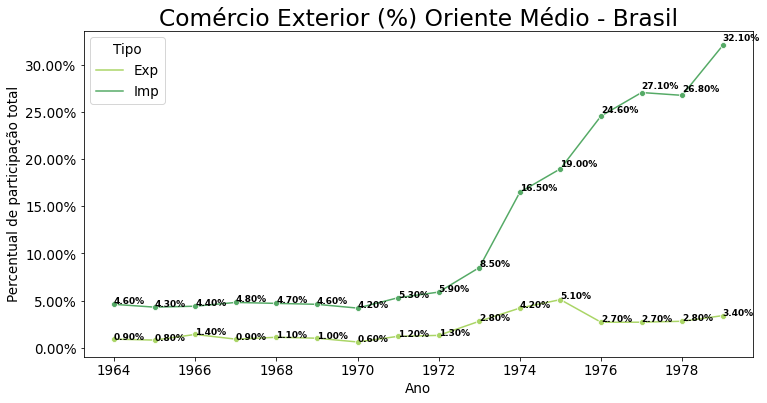

In [128]:
create_plots_II(df=oriente_medio, name = "Oriente Médio - Brasil")

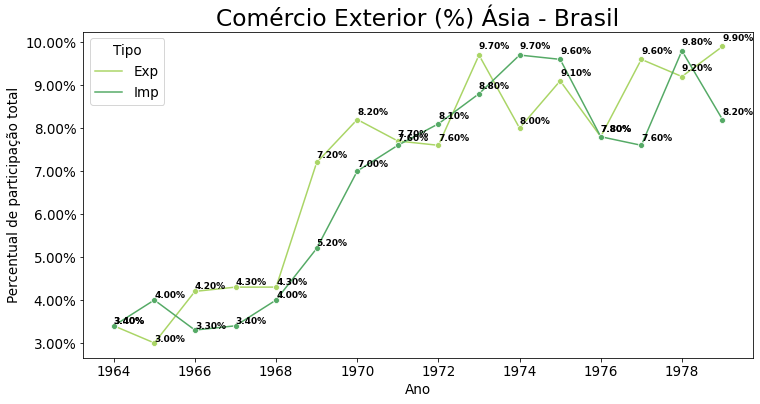

In [129]:
create_plots_II(df=asia, name = "Ásia - Brasil")

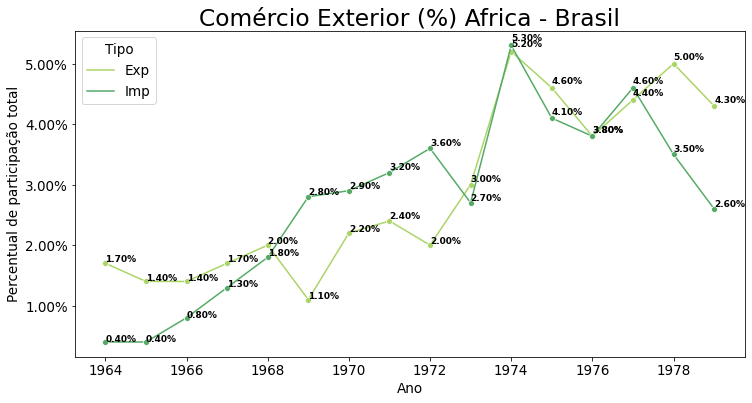

In [130]:
create_plots_II(df=africa, name = "Africa - Brasil")

### 100% Stacked barchart 

In [131]:
df_destino_imp = df_destino[['Ano', 'Destino', 'Valor_percentual', 'Tipo']][df_destino['Tipo'] == 'Imp'][['Ano', 'Destino', 'Valor_percentual']]
df_destino_exp = df_destino[['Ano', 'Destino', 'Valor_percentual', 'Tipo']][df_destino['Tipo'] == 'Exp'][['Ano', 'Destino', 'Valor_percentual']]
df_destino_exp.head()

,Ano,Destino,Valor_percentual
0,1964,América do Sul,0.097
1,1964,Estados Unidos,0.332
2,1964,Europa,0.329
3,1964,Ásia,0.034
4,1964,Oriente Médio,0.009


In [132]:
exp_pivot = df_destino_exp.pivot(index='Ano', columns='Destino', values='Valor_percentual')
imp_pivot = df_destino_imp.pivot(index='Ano', columns='Destino', values='Valor_percentual')
exp_pivot.head()

Destino,Africa,América do Sul,Estados Unidos,Europa,Oriente Médio,Ásia
Ano,,,,,,
1964,0.017,0.097,0.332,0.329,0.009,0.034
1965,0.014,0.126,0.326,0.322,0.008,0.030
1966,0.014,0.108,0.334,0.313,0.014,0.042
1967,0.017,0.098,0.331,0.335,0.009,0.043
1968,0.020,0.103,0.333,0.314,0.011,0.043


In [160]:
df_balanca_v2 = df_balanca[['Ano', 'Exp', 'Imp']]
df_balanca_v2.head()

,Ano,Exp,Imp
0,1964,1430000000,1086000000
1,1965,1595000000,941000000
2,1966,1741000000,1303000000
3,1967,1654000000,1441000000
4,1968,1881000000,1855000000


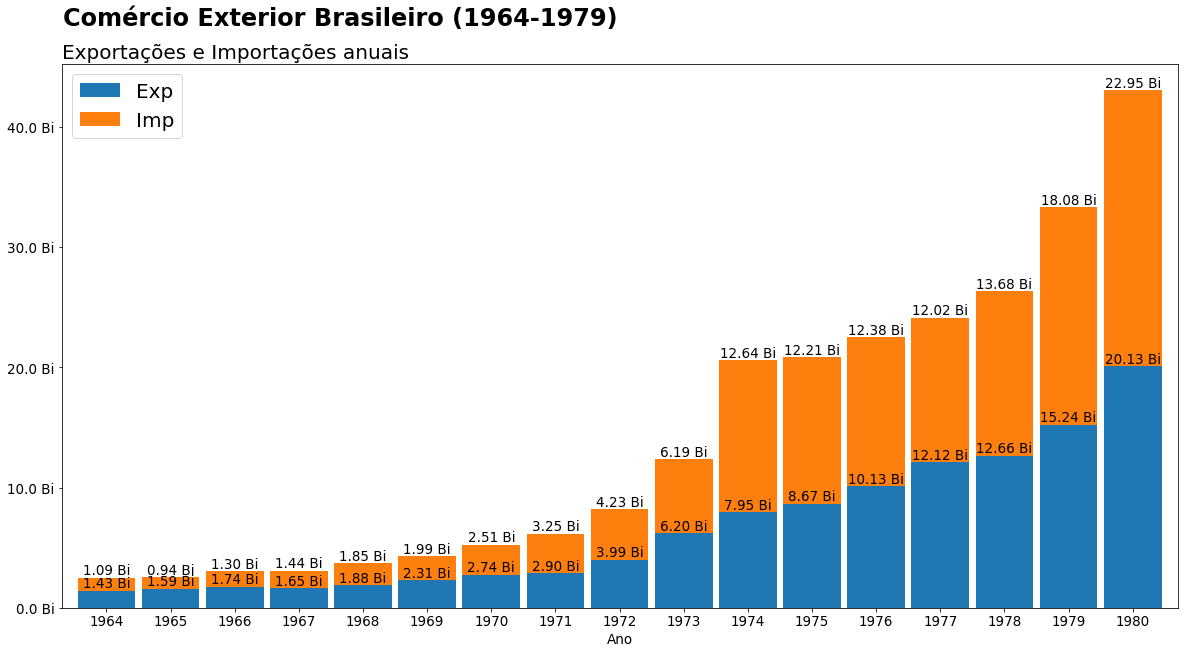

In [208]:
ax = df_balanca_v2.plot(kind = 'bar',
                        x='Ano', 
                        stacked=True, 
                        #colormap='Paired_r', 
                        figsize=(20, 10), 
                        width = 0.9)

def millions(x, pos):
    return '%1.1f Bi' % (x * 1e-9)


formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

for i in ax.containers:
    labels = [f'{v.get_height()/1000000000:.2f} Bi' for v in i]
    ax.bar_label(i, labels=labels)

ax.legend(loc='best', fontsize=20)
ax.set_xticklabels(df_balanca_v2['Ano'], rotation=0, ha='center')

plt.title(
    "Exportações e Importações anuais",
    fontsize=20,
    loc="left",
)
plt.suptitle(
    "Comércio Exterior Brasileiro (1964-1979)",
    fontsize=24,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left"
)

plt.show()

In [138]:
ax.containers[0][0]

In [140]:
import numpy as np

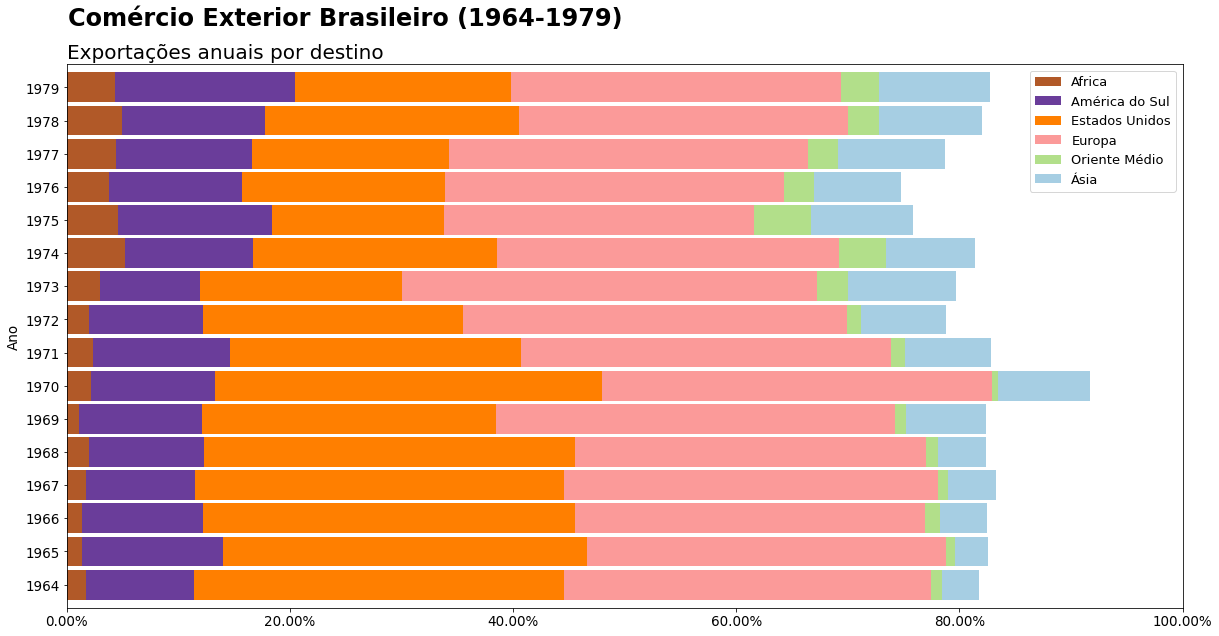

In [206]:
ax = exp_pivot.plot(kind = 'barh', 
                    stacked=True, 
                    colormap='Paired_r', 
                    figsize=(20, 10), 
                    width = 0.9)

"""for i in ax.containers:
    labels = [f'{v.get_width()*100:.2f} %' for v in i]
    ax.bar_label(i, labels=labels, label_type='center')  """

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))

ax.legend(loc='best', fontsize=13)
ax.set_xlim(0, 1)

plt.title(
    "Exportações anuais por destino",
    fontsize=20,
    loc="left",
)
plt.suptitle(
    "Comércio Exterior Brasileiro (1964-1979)",
    fontsize=24,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left"
)
plt.show()

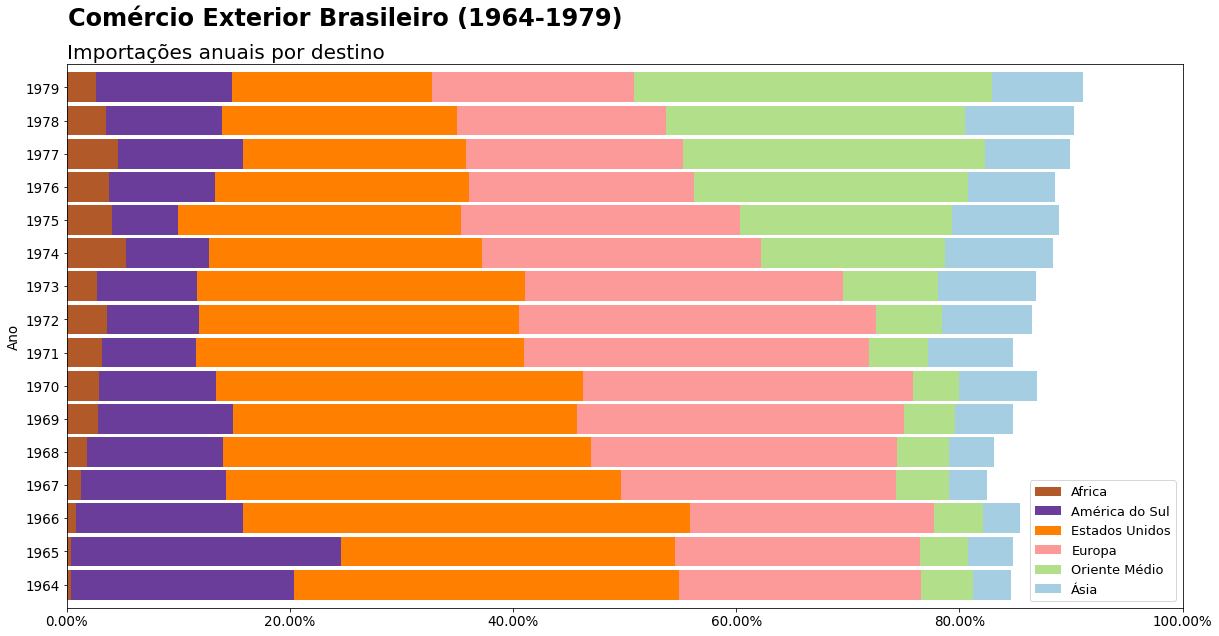

In [207]:
ax = imp_pivot.plot(kind = 'barh', 
                    stacked=True, 
                    colormap='Paired_r', 
                    figsize=(20, 10), 
                    width = 0.9)

"""for i in ax.containers:
    labels = [f'{v.get_width()*100:.2f} %' for v in i]
    ax.bar_label(i, labels=labels, label_type='center')  """

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))

ax.legend(loc='best', fontsize=13)
ax.set_xlim(0, 1)

plt.title(
    "Importações anuais por destino",
    fontsize=20,
    loc="left",
)
plt.suptitle(
    "Comércio Exterior Brasileiro (1964-1979)",
    fontsize=24,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left"
)
plt.show()